In [38]:
import pandas as pd
from geo_kpe_multidoc import GEO_KPE_MULTIDOC_CACHE_PATH
import os
import re
import joblib

from sklearn.metrics.pairwise import cosine_similarity
from operator import itemgetter

In [39]:
def get_embedding_files(path: str):
    for file in os.listdir(path):
        if (
            os.path.isfile(os.path.join(path, file))
            and os.path.splitext(file)[1] == ".pkl"
        ):
            yield file

In [40]:
similarities = []
no_in_context = []

# skip = False
for name in get_embedding_files(
    os.path.join(GEO_KPE_MULTIDOC_CACHE_PATH, "temp_embeddings")
):
    # if skip:
    #     break
    # skip = False if skip else True
    candidate_embeddings = joblib.load(name)
    for candidate, embeddings in candidate_embeddings.items():
        in_context_embeddings = embeddings.get("in_context", [])
        if len(in_context_embeddings) == 0:
            # print(f"Skipping candidate '{candidate}' only out_context.")
            no_in_context.append(candidate)
            continue
        
        similarities.extend(
            [
                (
                    candidate,
                    cosine_similarity(
                        in_context.reshape(1, -1), out_context_embeddings.reshape(1, -1)
                    ).item(),
                )
                for in_context in in_context_embeddings
            ]
        )

In [41]:
from itertools import islice

list(islice(candidate_embeddings.keys(), 3))

['Los Angeles County district attorney',
 'former President Gerald R. Ford',
 'publishing titan Malcolm Forbes']

In [34]:
candidates, sims = list(zip(*similarities))

<AxesSubplot:ylabel='Frequency'>

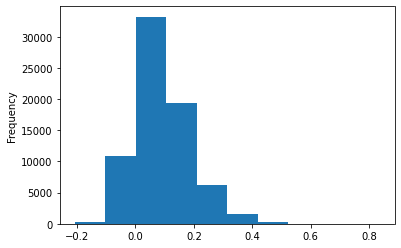

In [36]:
pd.Series(sims).plot.hist()

In [37]:
print(f"""#mentions (in, out)        {len(candidates)},
    #unique candidates     {len(set(candidates))}, 
#candidates without (in)    {len(no_in_context)}
""")

#mentions (in, out)        71859,
    #unique candidates     23360, 
#candidates without (in)    2548

